In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load
!git clone https://github.com/amazon-science/chronos-forecasting.git

fatal: destination path 'chronos-forecasting' already exists and is not an empty directory.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# 設定 seaborn 主題，這會影響圖表的風格和顏色
sns.set_theme()  # Apply the default Seaborn theme
%matplotlib inline
# Libraries for statistical and scientific computing
import statsmodels.api as sm
from scipy import stats
from pytorch_lightning.callbacks import EarlyStopping, Callback, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler, StandardScaler

/Users/apple/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 使用pandas讀取CSV文件
df = pd.read_csv('https://raw.githubusercontent.com/xc90529/noninvasiv_visualization/main/DATA%20SET/noninvasive_data.csv')

# Calculating the Shock Index as PR / SYS
df['PR/SYS'] = df['PR'] / df['SYS']
# To display the top 5 rows
df.head(5)


#CO-心輸出量
#CI - 心輸出指數
#SV - 舒張容積
#SVI - 舒張容積指數
#SVV - 舒張容積變異度
#SVR - 舒張容積阻力
#SVRI - 舒張容積指數阻力
#PR - 脈搏率
#SYS - 收縮壓
#DIA - 舒張壓
#MAP - 平均動脈壓

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.000000,0.801724
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.333333,0.779661
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.666667,0.760331
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.000000,0.745763
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.333333,1.000000


In [4]:
# Calculating the Shock Index as PR / SYS
df['PR/SYS'] = df['PR'] / df['SYS']

# Displaying the first few rows of the dataframe to confirm the new variable
df.head()

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.000000,0.801724
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.333333,0.779661
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.666667,0.760331
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.000000,0.745763
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.333333,1.000000


In [5]:
# Remove the 'ID' column and the 'si1m' column from your DataFrame
columns_to_check = df.drop(columns=['ID', 'si1m', ])

# Use the duplicated method to find duplicate rows
duplicate_rows = df[df.duplicated(subset=columns_to_check, keep=False)]

# Print the content of duplicate rows
print("Duplicate rows:")
print(duplicate_rows)
# 要排除的列名
columns_to_exclude = ['ID', 'si1m']

# 选择除了要排除的列以外的其他列
columns_to_check = df.columns[~df.columns.isin(columns_to_exclude)]

# 使用 selected_columns 作为子集来检查重复行，保留第一个重复行
duplicate_rows_df = df[df.duplicated(subset=columns_to_check, keep='first')]

# 打印重复行的数量
print("重复行的数量：", duplicate_rows_df.shape[0])

# 打印重复行的内容
print("重复行：")
print(duplicate_rows_df)
# 重置索引
df.reset_index(drop=True, inplace=True)

# 在原始数据框 df 中删除重复行
df = df.drop(duplicate_rows_df.index)

# 现在 df 中已经不包含重复行
print(df)

Duplicate rows:
      si1m   CO        CI  SV        SVI  SVV     SVR         SVRI   PR  SYS  \
17619    N  3.1  1.962025  49  31.012658   18  1558.0   986.075949   64   97   
17620    N  3.1  1.962025  49  31.012658   18  1558.0   986.075949   64   97   
17621    Y  2.9  1.835443  46  29.113924   17  1643.0  1039.873418   63   94   
17622    N  2.9  1.835443  46  29.113924   17  1643.0  1039.873418   63   94   
17623    Y  2.8  1.772152  45  28.481013   18  1878.0  1188.607595   62  101   
...    ...  ...       ...  ..        ...  ...     ...          ...  ...  ...   
35911    N  3.1  2.300000  27  20.000000   16  2038.0  2790.000000  116  101   
35912    Y  3.1  2.200000  27  20.000000   16  2045.0  2800.000000  112  101   
35913    N  3.1  2.200000  27  20.000000   16  2045.0  2800.000000  112  101   
35914    Y  2.9  2.100000  29  21.000000   13  2150.0  2945.000000  102  101   
35915    N  2.9  2.100000  29  21.000000   13  2150.0  2945.000000  102  101   

       DIA  MAP    ID  

四捨五入

In [6]:
rounded_df = df.round(5)

rounded_df.head()

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.00000,0.80172
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.33333,0.77966
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.66667,0.76033
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.00000,0.74576
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.33333,1.00000


相關係數分析

In [7]:
# 將 'si1m' 欄的 'Y' 轉換為 1，'N' 轉換為 0
rounded_df['si1m'] = rounded_df['si1m'].map({'Y': 1, 'N': 0})

# 计算除 'ID' 'si1m' 列外的所有列的 Pearson 相关系数
correlation_matrix = rounded_df.drop(['ID', 'si1m'], axis=1).corr()

# 打印与 'PR/SYS' 相关的相关系数
print(correlation_matrix['PR/SYS'])


CO        0.075229
CI        0.088904
SV       -0.367625
SVI      -0.407779
SVV       0.234460
SVR      -0.258130
SVRI     -0.187680
PR        0.743472
SYS      -0.708988
DIA      -0.183142
MAP      -0.494982
time     -0.238417
PR/SYS    1.000000
Name: PR/SYS, dtype: float64


In [8]:
## 計算'si1m'和'PR/SYS'相關性
import scipy.stats

# 确保 si1m 是二元分类变量
point_biserial_corr = scipy.stats.pointbiserialr(rounded_df['si1m'], rounded_df['PR/SYS'])
print("Point Biserial Correlation between 'si1m' and 'PR/SYS':", point_biserial_corr.correlation)

##選擇SVI,SVRI,si1m,SVV來預測PR/SYS

Point Biserial Correlation between 'si1m' and 'PR/SYS': 0.6480595105599248


In [9]:
# 選擇病人 #_9 的數據
id9 = rounded_df[rounded_df['ID'] == '#_9']
id9

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
6590,0,3.6,2.3,46,29.0,19,1444.44444,2260.86957,78,91,57,69,#_9,120.00000,0.85714
6591,0,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,120.33333,0.95745
6592,0,4.3,2.8,48,31.0,22,1227.90698,1885.71429,89,88,59,70,#_9,120.66667,1.01136
6593,0,4.4,2.9,47,30.0,20,1236.36364,1875.86207,95,92,59,72,#_9,121.00000,1.03261
6594,0,4.2,2.7,44,28.0,22,1238.09524,1925.92593,96,89,56,69,#_9,121.33333,1.07865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8796,0,3.0,2.0,42,27.0,21,1840.00000,2760.00000,73,90,61,73,#_9,1393.00000,0.81111
8797,0,2.5,1.6,35,22.0,21,2016.00000,3150.00000,73,81,56,67,#_9,1393.33333,0.90123
8798,0,3.4,2.2,46,30.0,34,1694.11765,2618.18182,74,89,63,76,#_9,1394.66667,0.83146
8799,0,2.4,1.5,35,22.0,34,1766.66667,2826.66667,68,70,44,57,#_9,1395.00000,0.97143


移除異常值

In [10]:
# 参数化测试集占总数据的比例
test_ratio = 0.2

# 计算各数据集的大小
total_size = len(id9)
test_size = int(total_size * test_ratio)  # 计算测试集大小

# 剩余的为训练集大小
train_size = total_size - test_size

# 定义分割索引
test_start = total_size - test_size

# 分割DataFrame
train_df = id9.iloc[:test_start]
test_df = id9.iloc[test_start:]

# 检查分割结果
print(f"训练集大小：{len(train_df)}")
print(f"测试集大小：{len(test_df)}")


训练集大小：1769
测试集大小：442


In [11]:
train_df

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
6590,0,3.6,2.3,46,29.0,19,1444.44444,2260.86957,78,91,57,69,#_9,120.00000,0.85714
6591,0,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,120.33333,0.95745
6592,0,4.3,2.8,48,31.0,22,1227.90698,1885.71429,89,88,59,70,#_9,120.66667,1.01136
6593,0,4.4,2.9,47,30.0,20,1236.36364,1875.86207,95,92,59,72,#_9,121.00000,1.03261
6594,0,4.2,2.7,44,28.0,22,1238.09524,1925.92593,96,89,56,69,#_9,121.33333,1.07865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,0,4.0,2.6,37,24.0,0,1780.00000,2738.46154,109,118,76,93,#_9,1160.66667,0.92373
8355,0,5.8,3.7,53,34.0,0,1158.62069,1816.21622,110,110,72,88,#_9,1161.00000,1.00000
8356,0,4.0,2.6,34,22.0,17,1680.00000,2584.61538,119,110,75,88,#_9,1161.33333,1.08182
8357,0,5.1,3.3,49,31.0,17,1364.70588,2109.09091,104,109,75,91,#_9,1161.66667,0.95413


In [12]:
test_df

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
8359,0,4.1,2.6,38,25.0,24,1756.09756,2769.23077,106,120,77,94,#_9,1162.33333,0.88333
8360,0,4.0,2.6,36,23.0,24,1580.00000,2430.76923,110,103,68,83,#_9,1162.66667,1.06796
8361,0,5.1,3.3,45,29.0,21,1301.96078,2012.12121,115,108,71,87,#_9,1163.00000,1.06481
8362,0,4.4,2.8,41,26.0,22,1400.00000,2200.00000,107,107,66,81,#_9,1163.33333,1.00000
8363,0,4.6,2.9,44,28.0,24,1460.86957,2317.24138,104,113,72,88,#_9,1163.66667,0.92035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8796,0,3.0,2.0,42,27.0,21,1840.00000,2760.00000,73,90,61,73,#_9,1393.00000,0.81111
8797,0,2.5,1.6,35,22.0,21,2016.00000,3150.00000,73,81,56,67,#_9,1393.33333,0.90123
8798,0,3.4,2.2,46,30.0,34,1694.11765,2618.18182,74,89,63,76,#_9,1394.66667,0.83146
8799,0,2.4,1.5,35,22.0,34,1766.66667,2826.66667,68,70,44,57,#_9,1395.00000,0.97143


In [13]:
train_df
# 查看 'PR/SYS' 列的最大值和最小值
train_df_pr_sys_max = train_df['PR/SYS'].max()
train_df_pr_sys_min = train_df['PR/SYS'].min()

train_df_pr_sys_max, train_df_pr_sys_min

(1.44928, 0.30657)

In [14]:
test_df
# 查看 'PR/SYS' 列的最大值和最小值
test_pr_sys_max = test_df['PR/SYS'].max()
test_pr_sys_min = test_df['PR/SYS'].min()

test_pr_sys_max, test_pr_sys_min 

(2.10714, 0.36111)

In [15]:
# 定义异常值检测和移除函数，只处理数值列
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[float, int]).columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = ((df[numeric_cols] >= lower_bound) & (df[numeric_cols] <= upper_bound)).all(axis=1)
    return df[mask]

# 分别处理训练集、验证集和测试集的异常值
train_df_cleaned = remove_outliers(train_df)
test_df_cleaned = remove_outliers(test_df)
# 检查分割结果
print(f"训练集大小：{len(train_df_cleaned)}")
print(f"测试集大小：{len(test_df_cleaned)}")

训练集大小：1527
测试集大小：372


In [16]:
# 查找 'PR/SYS' 列的最大值
pr_sys_max = train_df_cleaned['PR/SYS'].max()

# 查找 'PR/SYS' 列的最小值
pr_sys_min = train_df_cleaned['PR/SYS'].min()

print(f"'PR/SYS' 最大值: {pr_sys_max}")
print(f"'PR/SYS' 最小值: {pr_sys_min}")


'PR/SYS' 最大值: 1.02174
'PR/SYS' 最小值: 0.54688


In [17]:
 # 查找 'PR/SYS' 列的最大值
pr_sys_max = test_df_cleaned['PR/SYS'].max()

# 查找 'PR/SYS' 列的最小值
pr_sys_min = test_df_cleaned['PR/SYS'].min()

print(f"'PR/SYS' 最大值: {pr_sys_max}")
print(f"'PR/SYS' 最小值: {pr_sys_min}")


'PR/SYS' 最大值: 1.11429
'PR/SYS' 最小值: 0.57143


In [18]:
# 假设 train_df, val_df, test_df 分别是已经处理异常值的训练集、未处理异常值的验证集和测试集
# 如果您已经移除了训练集中的异常值并保存在 filtered_train_df，确保这里使用正确的变量名

# 合并训练集、验证集和测试集
combined_df = pd.concat([train_df_cleaned, test_df_cleaned], axis=0)

# 检查合并后的数据集大小
print(f"合并后的数据集大小: {combined_df.shape}")

# 现在 combined_df 包含了整个数据集，您可以在这个数据集上进行缺失值的填充



合并后的数据集大小: (1899, 15)


In [19]:
combined_df

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
6590,0,3.6,2.3,46,29.0,19,1444.44444,2260.86957,78,91,57,69,#_9,120.00000,0.85714
6595,0,4.3,2.8,50,32.0,19,1265.11628,1942.85714,87,94,58,72,#_9,121.66667,0.92553
6597,0,4.6,3.0,54,35.0,23,1234.78261,1893.33333,84,95,61,75,#_9,122.33333,0.88421
6598,0,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,122.66667,0.89247
6599,0,4.4,2.8,47,30.0,15,1236.36364,1942.85714,94,92,59,72,#_9,123.00000,1.02174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,0,3.1,2.0,43,28.0,23,1987.09677,3080.00000,73,101,65,81,#_9,1391.33333,0.72277
8792,0,3.3,2.1,44,28.0,26,1890.90909,2971.42857,75,104,67,82,#_9,1391.66667,0.72115
8794,0,2.8,1.8,38,24.0,17,1942.85714,3022.22222,73,92,58,72,#_9,1392.33333,0.79348
8796,0,3.0,2.0,42,27.0,21,1840.00000,2760.00000,73,90,61,73,#_9,1393.00000,0.81111


填充id9 120~1395的缺失值，以0.33333為單位

In [20]:
import pandas as pd
import numpy as np

# Removing ID prefix and converting to integers for correct sorting
patient_time_ranges = combined_df.groupby('ID')['time'].agg(['min', 'max'])
patient_time_ranges['ID_numeric'] = patient_time_ranges.index.str.replace('#_', '').astype(int)
patient_time_ranges_sorted = patient_time_ranges.sort_values('ID_numeric')

# Create a mapping from ID to their min and max times
time_ranges = patient_time_ranges_sorted.to_dict('index')

# Function to create and fill the time range based on min and max times for a specific patient
def fill_time_for_id(group, id):
    if group['ID'].iloc[0] == id:
        min_time, max_time = time_ranges[id]['min'], time_ranges[id]['max']
        
        # Generate the full range of desired time values including fractional times
        full_time_range = np.arange(min_time, max_time + 0.00001, 1/3)
        full_time_range = np.round(full_time_range, 5)  # round to 5 decimal places

        # Creating a DataFrame for the complete time range
        full_df = pd.DataFrame(full_time_range, columns=['time'])

        # Merging this with the existing group data
        merged_group = pd.merge(full_df, group, on='time', how='left')

        # Forward fill to handle the missing data
        merged_group.ffill(inplace=True)
        
        # For any remaining missing values (if any)
        merged_group.bfill(inplace=True)
        
        return merged_group
    else:
        return group

# Applying the filling function only to the group for ID #_9
filled_data = pd.concat([fill_time_for_id(group, '#_9') for _, group in combined_df.groupby('ID')])
filled_data_id_9 = filled_data[filled_data['ID'] == '#_9']

# Display a sample of the filled data for ID #_9
filled_data_id_9.head()


,time,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,PR/SYS
0,120.00000,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714
1,120.33333,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714
2,120.66667,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714
3,121.00000,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714
4,121.33333,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714


In [21]:
# 創建 DataFrame
final_data_adjusted_with_all_filled = pd.DataFrame(filled_data_id_9)

# 創建 time_new 列並設置索引
final_data_adjusted_with_all_filled['time_new'] = final_data_adjusted_with_all_filled['time']
final_data_adjusted_with_all_filled.set_index('time_new', inplace=True)

# 選擇 PR/SYS 特徵進行訓練預測
selected_features_df = final_data_adjusted_with_all_filled[['PR/SYS','time']]

# 顯示結果
print(selected_features_df.head())

            PR/SYS       time
time_new                     
120.00000  0.85714  120.00000
120.33333  0.85714  120.33333
120.66667  0.85714  120.66667
121.00000  0.85714  121.00000
121.33333  0.85714  121.33333


In [22]:
selected_features_df

,PR/SYS,time
time_new,,
120.00000,0.85714,120.00000
120.33333,0.85714,120.33333
120.66667,0.85714,120.66667
121.00000,0.85714,121.00000
121.33333,0.85714,121.33333
...,...,...
1392.00000,0.72115,1392.00000
1392.33333,0.79348,1392.33333
1392.66667,0.79348,1392.66667


In [23]:
# 將時間填充好且特徵選取過後的數據，另存到桌面上 CSV 文件
selected_features_df .to_csv('~/Desktop/id9_Fin_0402.csv')


劃分訓練集 測試集

In [24]:
# 參數設定
test_ratio = 0.4

# 計算測試集和驗證集的大小
total_size = len(selected_features_df)
test_size = int(total_size * test_ratio)  # 測試集原始大小
val_size = int(test_size * 0.5)          # 驗證集大小是測試集的一半

# 分割索引
test_start = total_size - test_size
val_start = test_start + val_size         # 驗證集開始的位置

# 分割DataFrame為訓練集、驗證集、測試集
train_df = selected_features_df.iloc[:test_start]
val_df = selected_features_df.iloc[test_start:val_start]
test_df = selected_features_df.iloc[val_start:]
extended_train_df = train_df.copy()
extended_val_df = val_df.copy()
extended_test_df= test_df.copy()
# 檢查分割結果
print(f"訓練集大小：{len(train_df)}")
print(f"驗證集大小：{len(val_df)}")
print(f"測試集大小：{len(test_df)}")


訓練集大小：2293
驗證集大小：764
測試集大小：764


In [25]:
train_df

,PR/SYS,time
time_new,,
120.00000,0.85714,120.00000
120.33333,0.85714,120.33333
120.66667,0.85714,120.66667
121.00000,0.85714,121.00000
121.33333,0.85714,121.33333
...,...,...
882.66667,0.76316,882.66667
883.00000,0.76316,883.00000
883.33333,0.76316,883.33333


In [26]:
val_df

,PR/SYS,time
time_new,,
884.33333,0.76316,884.33333
884.66667,0.76316,884.66667
885.00000,0.76316,885.00000
885.33333,0.76316,885.33333
885.66667,0.76316,885.66667
...,...,...
1137.33333,1.00909,1137.33333
1137.66667,1.00909,1137.66667
1138.00000,1.00909,1138.00000


In [27]:
test_df

,PR/SYS,time
time_new,,
1139.00000,1.00909,1139.00000
1139.33333,1.00909,1139.33333
1139.66667,1.00909,1139.66667
1140.00000,1.00909,1140.00000
1140.33333,1.00909,1140.33333
...,...,...
1392.00000,0.72115,1392.00000
1392.33333,0.79348,1392.33333
1392.66667,0.79348,1392.66667


新的測試

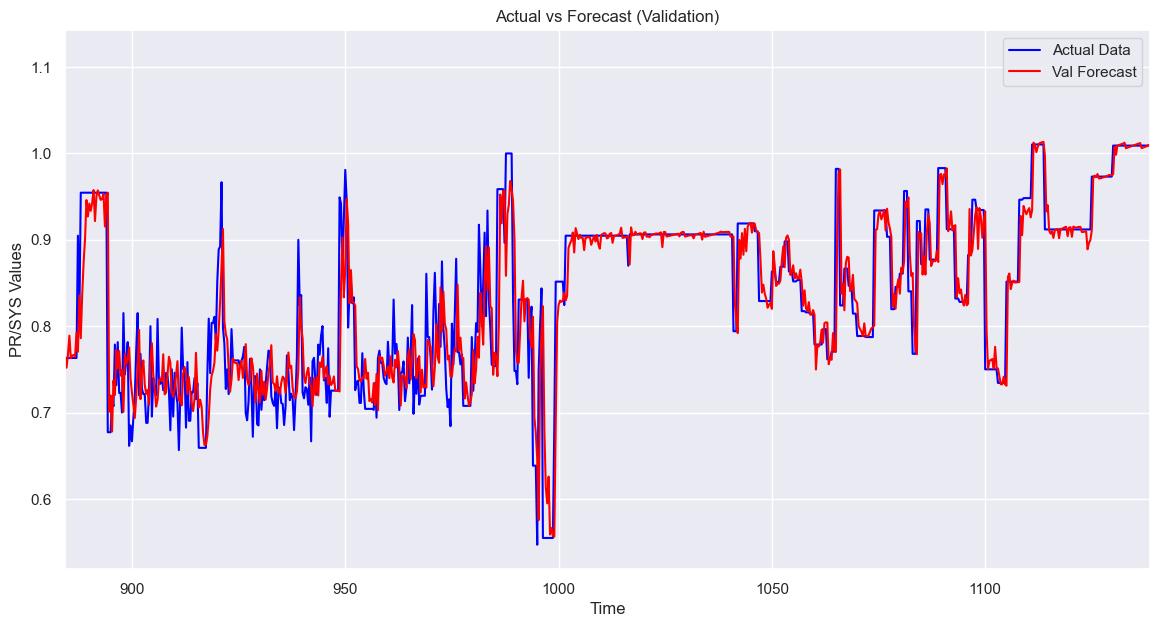

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from chronos import ChronosPipeline

# 加载模型
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cpu",
    torch_dtype=torch.float32,
)

# 定义要选择的特征列
features = ['PR/SYS']

# 从 train_df 中选择这些特征
feature_data = train_df[features].to_numpy().astype('float32')

# 转换特征数据为 PyTorch 张量
context_tensor = torch.tensor(feature_data)

# 设置预测长度
prediction_length = 1

# 预测验证集
all_forecasts = pd.DataFrame()  # 存储所有预测结果

while not extended_val_df.empty:
    # 更新上下文张量，包含了扩展后的训练集
    context_array = extended_train_df['PR/SYS'].to_numpy().astype('float32')
    context_tensor = torch.tensor(context_array).unsqueeze(0)

    # 计算这轮预测的长度，不能超过验证集的剩余长度
    current_prediction_length = min(prediction_length, len(extended_val_df))

    # 生成预测
    forecast = pipeline.predict(
        context=context_tensor,
        prediction_length=current_prediction_length,
        num_samples=10,
        temperature=1.0,
        top_k=50,
        top_p=1.0,
    )

    # 计算所有样本的平均预测值
    forecast_mean = forecast.mean(dim=1).squeeze(0).numpy()

    # 准备这轮预测的时间值，直接从 extended_val_df 中获取
    forecast_times = extended_val_df['time'].iloc[:current_prediction_length].values

    # 确保 forecast_times 和 forecast_mean 长度匹配且不为空
    if len(forecast_times) > 0 and len(forecast_mean) > 0:
        # 将这轮的平均预测值与其时间值结合
        forecast_df = pd.DataFrame(data=forecast_mean, index=forecast_times, columns=['PR/SYS'])
        all_forecasts = pd.concat([all_forecasts, forecast_df])

        # 将接下来的一段时间的实际数据从验证集移动到扩展的训练集中
        actual_data_to_add = extended_val_df.iloc[:current_prediction_length]
        extended_train_df = pd.concat([extended_train_df, actual_data_to_add])
        extended_val_df = extended_val_df.iloc[current_prediction_length:]

# 从合并后的训练和测试数据集中提取实际数据
actual_data = selected_features_df['PR/SYS']

# 获取预测数据并将其与实际数据合并
forecast_data = all_forecasts['PR/SYS']

# 绘制实际数据和预测数据
plt.figure(figsize=(14, 7))
plt.plot(actual_data.index, actual_data, label='Actual Data', color='blue')
plt.plot(forecast_data.index, forecast_data, label='Val Forecast', color='red', linestyle='-')
plt.title('Actual vs Forecast (Validation)')
plt.xlabel('Time')
plt.ylabel('PR/SYS Values')
plt.legend()
plt.grid(True)

# 设置横坐标范围，放大显示指定范围的数据
plt.xlim(884.33333, 1138.66667)

plt.show()


In [29]:
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt

# 加载模型
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cpu",
    torch_dtype=torch.float32,
)

# 复制一份 extended_train_df 作为 extended_train_data
extended_train_data = extended_train_df.copy()

# 额外預測extended_test_df的時間
additional_prediction_length = len(extended_test_df)

# 初始化计数器
prediction_counter = 0
prediction_batch_size = 30

# 存储额外预测的 DataFrame
additional_forecasts = pd.DataFrame()

# 外部循环 - 每30笔预测一个循环
while additional_prediction_length > 0:
    # 内部循环 - 每次处理一笔预测
    for _ in range(prediction_batch_size):
        if additional_prediction_length <= 0:
            break

        # 生成预测
        context_array = extended_train_df['PR/SYS'].to_numpy().astype('float32')
        context_tensor = torch.tensor(context_array).unsqueeze(0)

        forecast = pipeline.predict(
            context=context_tensor,
            prediction_length=1,
            num_samples=10,
            temperature=1.0,
            top_k=50,
            top_p=1.0,
        )

        # 计算预测的平均值并去除数组的外层
        forecast_mean = forecast.mean(dim=1).squeeze(0).item()

        # 获取新时间值
        forecast_time = extended_test_df['time'].iloc[0]

        # 创建新的预测 DataFrame
        new_forecast = pd.DataFrame({'PR/SYS': [forecast_mean], 'time': [forecast_time]}, index=[extended_test_df.index[0]])
        additional_forecasts = pd.concat([additional_forecasts, new_forecast])

        # 更新 extended_train_df - 加入新预测值
        extended_train_df = pd.concat([extended_train_df, new_forecast])

        # 更新 extended_train_data - 加入真实数据的第一行
        real_data = extended_test_df.iloc[0:1].copy()
        extended_train_data = pd.concat([extended_train_data, real_data])

        # 删除 extended_test_df 中已使用的第一行
        extended_test_df = extended_test_df.iloc[1:]

        # 减少剩余的预测长度
        additional_prediction_length -= 1

        # 递增计数器
        prediction_counter += 1

    # 每30次预测后，将 extended_train_data 的内容替代 extended_train_df
    if prediction_counter % prediction_batch_size == 0:
        extended_train_df = extended_train_data.copy()

# 打印额外测试时间点的预测结果
print(additional_forecasts)


              PR/SYS        time
1139.00000  1.010600  1139.00000
1139.33333  1.011259  1139.33333
1139.66667  1.012560  1139.66667
1140.00000  1.012263  1140.00000
1140.33333  1.012131  1140.33333
...              ...         ...
1392.00000  0.779378  1392.00000
1392.33333  0.765493  1392.33333
1392.66667  0.768249  1392.66667
1393.00000  0.769861  1393.00000
1393.33333  0.768028  1393.33333

[764 rows x 2 columns]


In [30]:
actual_data

time_new
120.00000     0.85714
120.33333     0.85714
120.66667     0.85714
121.00000     0.85714
121.33333     0.85714
               ...   
1392.00000    0.72115
1392.33333    0.79348
1392.66667    0.79348
1393.00000    0.81111
1393.33333    0.90123
Name: PR/SYS, Length: 3821, dtype: float64

In [31]:
additional_forecasts

,PR/SYS,time
1139.00000,1.010600,1139.00000
1139.33333,1.011259,1139.33333
1139.66667,1.012560,1139.66667
1140.00000,1.012263,1140.00000
1140.33333,1.012131,1140.33333
...,...,...
1392.00000,0.779378,1392.00000
1392.33333,0.765493,1392.33333
1392.66667,0.768249,1392.66667
1393.00000,0.769861,1393.00000


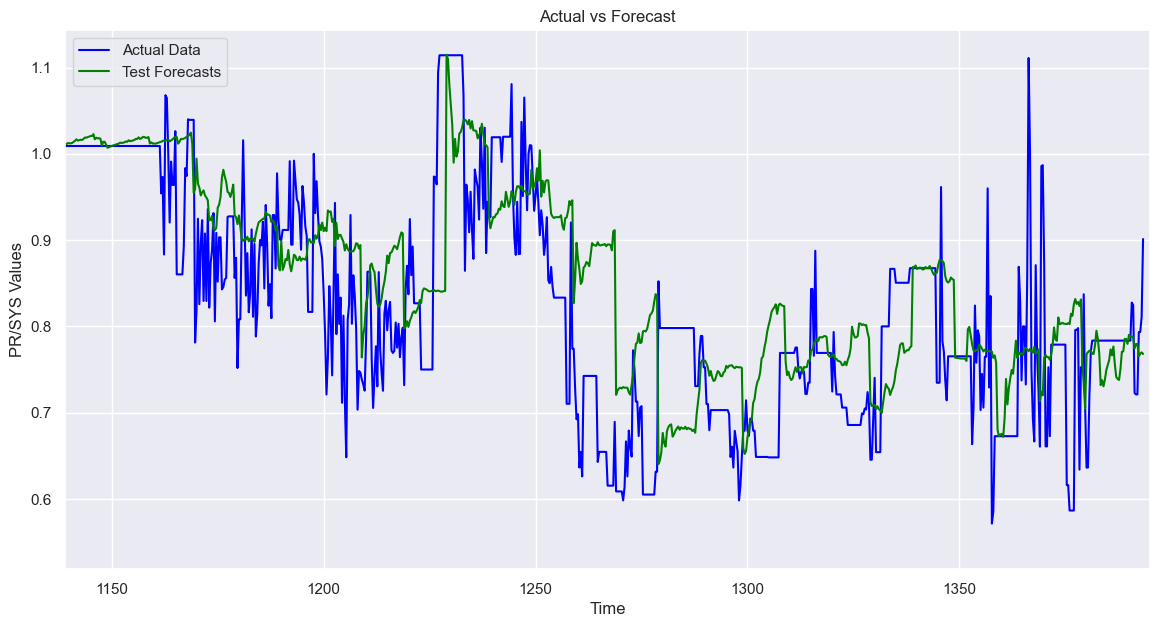

In [32]:
# 绘制实际数据和预测数据
plt.figure(figsize=(14, 7))
plt.plot(actual_data.index, actual_data, label='Actual Data', color='blue')
plt.plot(additional_forecasts.index, additional_forecasts['PR/SYS'], label='Test Forecasts', color='green', linestyle='-')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('PR/SYS Values')
plt.legend()
plt.grid(True)

# 设置横坐标范围，放大显示指定范围的数据
plt.xlim(1139, 1395)
plt.show()

In [33]:
actual_data

time_new
120.00000     0.85714
120.33333     0.85714
120.66667     0.85714
121.00000     0.85714
121.33333     0.85714
               ...   
1392.00000    0.72115
1392.33333    0.79348
1392.66667    0.79348
1393.00000    0.81111
1393.33333    0.90123
Name: PR/SYS, Length: 3821, dtype: float64

In [34]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error between two arrays."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]))*100

def mae(y_true, y_pred):
    """Calculate Mean Absolute Error using sklearn, returning as percentage."""
    return mean_absolute_error(y_true, y_pred)*100

def mse(y_true, y_pred):
    """Calculate Mean Squared Error using sklearn, returning as percentage."""
    return mean_squared_error(y_true, y_pred)*100

# 将预测数据与实际数据对齐
common_index = actual_data.index.intersection(forecast_data.index)
actual_data_aligned = actual_data.loc[common_index].to_numpy()
forecast_data_aligned = forecast_data.loc[common_index].to_numpy()

# 计算val的 MAPE, MAE 和 MSE
MAPE = mape(actual_data_aligned, forecast_data_aligned)
MAE = mae(actual_data_aligned, forecast_data_aligned)
MSE = mse(actual_data_aligned, forecast_data_aligned)

print(f"val_MAPE: {MAPE}%")
print(f"val_MAE: {MAE}%")
print(f"val_MSE: {MSE}%")




val_MAPE: 3.2781584783151545%
val_MAE: 2.6062434778662875%
val_MSE: 0.20460504843727656%


In [35]:
# 对额外的test时间点的预测计算误差指标
additional_common_index = actual_data.index.intersection(additional_forecasts.index)

# 对齐并提取实际数据
additional_actual_data_aligned = actual_data.loc[additional_common_index].to_numpy()

# 提取预测数据的 PR/SYS 列（假设它是第二列）
additional_forecast_data_aligned = additional_forecasts.loc[additional_common_index].to_numpy()[:, 0]

# 计算 MAPE, MAE 和 MSE
additional_MAPE = mape(additional_actual_data_aligned, additional_forecast_data_aligned)
additional_MAE = mae(additional_actual_data_aligned, additional_forecast_data_aligned)
additional_MSE = mse(additional_actual_data_aligned, additional_forecast_data_aligned)

print(f"test_MAPE: {additional_MAPE}%")
print(f"test_MAE: {additional_MAE}%")
print(f"test_MSE: {additional_MSE}%")


test_MAPE: 9.471101991040676%
test_MAE: 7.244386373472462%
test_MSE: 0.9340615774442322%


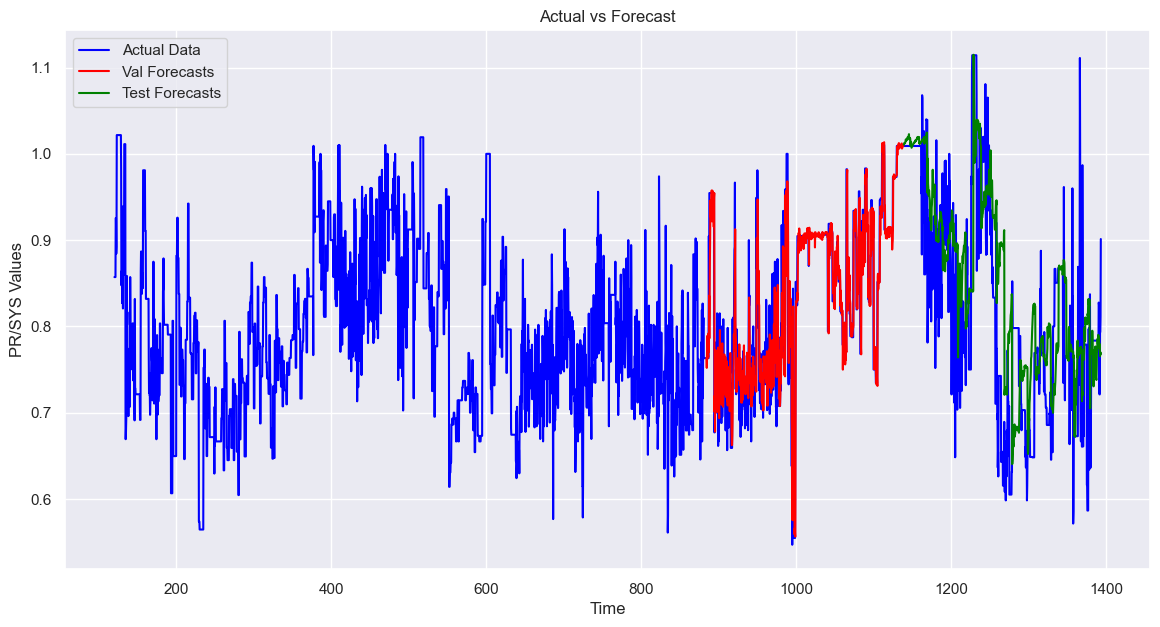

In [36]:
# 绘制实际数据和预测数据
plt.figure(figsize=(14, 7))
plt.plot(actual_data.index, actual_data, label='Actual Data', color='blue')
plt.plot(forecast_data.index, forecast_data, label='Val Forecasts', color='red', linestyle='-')
plt.plot(additional_forecasts.index, additional_forecasts['PR/SYS'], label='Test Forecasts', color='green', linestyle='-')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('PR/SYS Values')
plt.legend()
plt.grid(True)

# 设置横坐标范围，放大显示指定范围的数据
plt.xlim()
plt.show()

In [37]:
all_forecasts #（驗證集預測結果，紅色部分，764筆)
#一次預測1個時間單位，在預測完畢後，將預測值存到all_forecasts，
#將該時間點的真實值輸入到訓練集extended_train_df裡面，進行下次預測

,PR/SYS
884.33333,0.763521
884.66667,0.751905
885.00000,0.767613
885.33333,0.788974
885.66667,0.762843
...,...
1137.33333,1.007404
1137.66667,1.008054
1138.00000,1.008612
1138.33333,1.009929


In [38]:
additional_forecasts #額外預測結果，綠色部分，764筆
#一次預測1個時間單位，在預測完畢後，將預測值存到additional_forecasts ，
#將該時間點的真實值輸入到訓練集裡面，進行下次預測

,PR/SYS,time
1139.00000,1.010600,1139.00000
1139.33333,1.011259,1139.33333
1139.66667,1.012560,1139.66667
1140.00000,1.012263,1140.00000
1140.33333,1.012131,1140.33333
...,...,...
1392.00000,0.779378,1392.00000
1392.33333,0.765493,1392.33333
1392.66667,0.768249,1392.66667
1393.00000,0.769861,1393.00000


In [39]:
extended_train_df #訓練集(包含訓練,驗證,額外預測)
#驗證部分,1次預測1筆，預測完畢後，將預測值存到all_forecasts,並從extended_test_df在該時間點，複製正確的值到extended_train_df，用來預測下筆資料，以此類推
#額外預測,1次預測1筆，預測完畢後，將預測值存到additional_forecasts,並直接複製該筆時間點的預測值到extended_train_df，用來預測下筆資料，
#30次後，將extended_train_data裡面的資料直接取代extended_train_df，用來校正，以免誤差一直累積，以此類推，直到結束。
#ps:最後未滿30筆的資料會直接輸出預測值

,PR/SYS,time
120.00000,0.857140,120.00000
120.33333,0.857140,120.33333
120.66667,0.857140,120.66667
121.00000,0.857140,121.00000
121.33333,0.857140,121.33333
...,...,...
1392.00000,0.779378,1392.00000
1392.33333,0.765493,1392.33333
1392.66667,0.768249,1392.66667
1393.00000,0.769861,1393.00000


In [40]:
extended_train_data
#從extended_train_df複製過來，一開始包含了train_data和val_dat的真實值，在後續額外預測起到了輔助作用
#每當預測完畢一筆額外資料，並儲存在additional_forecasts 後，就會從extended_test_df複製一筆資料，以此類推，複製完畢30次後
#會取代extended_train_df將誤差重置，並進行下一輪的預測，直到預測結束

,PR/SYS,time
time_new,,
120.00000,0.85714,120.00000
120.33333,0.85714,120.33333
120.66667,0.85714,120.66667
121.00000,0.85714,121.00000
121.33333,0.85714,121.33333
...,...,...
1392.00000,0.72115,1392.00000
1392.33333,0.79348,1392.33333
1392.66667,0.79348,1392.66667


In [41]:
additional_forecasts

,PR/SYS,time
1139.00000,1.010600,1139.00000
1139.33333,1.011259,1139.33333
1139.66667,1.012560,1139.66667
1140.00000,1.012263,1140.00000
1140.33333,1.012131,1140.33333
...,...,...
1392.00000,0.779378,1392.00000
1392.33333,0.765493,1392.33333
1392.66667,0.768249,1392.66667
1393.00000,0.769861,1393.00000


配合lstm

In [42]:
new_test_id9= additional_forecasts.copy()

In [43]:
final_data_adjusted_with_all_filled

,time,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,PR/SYS
time_new,,,,,,,,,,,,,,,
120.00000,120.00000,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714
120.33333,120.33333,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714
120.66667,120.66667,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714
121.00000,121.00000,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714
121.33333,121.33333,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392.00000,1392.00000,0.0,3.3,2.1,44.0,28.0,26.0,1890.90909,2971.42857,75.0,104.0,67.0,82.0,#_9,0.72115
1392.33333,1392.33333,0.0,2.8,1.8,38.0,24.0,17.0,1942.85714,3022.22222,73.0,92.0,58.0,72.0,#_9,0.79348
1392.66667,1392.66667,0.0,2.8,1.8,38.0,24.0,17.0,1942.85714,3022.22222,73.0,92.0,58.0,72.0,#_9,0.79348


In [44]:
new_selected_features_df = final_data_adjusted_with_all_filled[['PR/SYS','SVV','SVI','SVRI']]
# 重命名索引 'time_new' 为 'time'
new_selected_features_df.index.name = 'time'
new_selected_features_df.reset_index(inplace=True)
# 將 'time' 列設置回索引
new_selected_features_df.set_index('time', inplace=True)

# 查看修改后的数据框架
new_selected_features_df


,PR/SYS,SVV,SVI,SVRI
time,,,,
120.00000,0.85714,19.0,29.0,2260.86957
120.33333,0.85714,19.0,29.0,2260.86957
120.66667,0.85714,19.0,29.0,2260.86957
121.00000,0.85714,19.0,29.0,2260.86957
121.33333,0.85714,19.0,29.0,2260.86957
...,...,...,...,...
1392.00000,0.72115,26.0,28.0,2971.42857
1392.33333,0.79348,17.0,24.0,3022.22222
1392.66667,0.79348,17.0,24.0,3022.22222


In [45]:
new_selected_features_df 

,PR/SYS,SVV,SVI,SVRI
time,,,,
120.00000,0.85714,19.0,29.0,2260.86957
120.33333,0.85714,19.0,29.0,2260.86957
120.66667,0.85714,19.0,29.0,2260.86957
121.00000,0.85714,19.0,29.0,2260.86957
121.33333,0.85714,19.0,29.0,2260.86957
...,...,...,...,...
1392.00000,0.72115,26.0,28.0,2971.42857
1392.33333,0.79348,17.0,24.0,3022.22222
1392.66667,0.79348,17.0,24.0,3022.22222


In [46]:
new_test_id9

,PR/SYS,time
1139.00000,1.010600,1139.00000
1139.33333,1.011259,1139.33333
1139.66667,1.012560,1139.66667
1140.00000,1.012263,1140.00000
1140.33333,1.012131,1140.33333
...,...,...
1392.00000,0.779378,1392.00000
1392.33333,0.765493,1392.33333
1392.66667,0.768249,1392.66667
1393.00000,0.769861,1393.00000


In [47]:
new_selected_features_df 

,PR/SYS,SVV,SVI,SVRI
time,,,,
120.00000,0.85714,19.0,29.0,2260.86957
120.33333,0.85714,19.0,29.0,2260.86957
120.66667,0.85714,19.0,29.0,2260.86957
121.00000,0.85714,19.0,29.0,2260.86957
121.33333,0.85714,19.0,29.0,2260.86957
...,...,...,...,...
1392.00000,0.72115,26.0,28.0,2971.42857
1392.33333,0.79348,17.0,24.0,3022.22222
1392.66667,0.79348,17.0,24.0,3022.22222


In [48]:
import pandas as pd

# 复制 new_selected_features_df 以避免修改原始数据
merged_df = new_selected_features_df.copy()

# 在重叠时间点（即从1140开始）进行替换操作
overlap_times = merged_df.index.intersection(new_test_id9.index)

# 仅替换这些重叠时间点的 PR/SYS 值
merged_df.loc[overlap_times, 'PR/SYS'] = new_test_id9.loc[overlap_times, 'PR/SYS']

# 保留其他时间点的原始值，并查看最终结果
print(merged_df.head())


            PR/SYS   SVV   SVI        SVRI
time                                      
120.00000  0.85714  19.0  29.0  2260.86957
120.33333  0.85714  19.0  29.0  2260.86957
120.66667  0.85714  19.0  29.0  2260.86957
121.00000  0.85714  19.0  29.0  2260.86957
121.33333  0.85714  19.0  29.0  2260.86957


In [49]:
merged_df

,PR/SYS,SVV,SVI,SVRI
time,,,,
120.00000,0.857140,19.0,29.0,2260.86957
120.33333,0.857140,19.0,29.0,2260.86957
120.66667,0.857140,19.0,29.0,2260.86957
121.00000,0.857140,19.0,29.0,2260.86957
121.33333,0.857140,19.0,29.0,2260.86957
...,...,...,...,...
1392.00000,0.779378,26.0,28.0,2971.42857
1392.33333,0.765493,17.0,24.0,3022.22222
1392.66667,0.768249,17.0,24.0,3022.22222


In [50]:
import pandas as pd

# 假設你的 DataFrame 名為 new_data_id9_0819
# 將 'PR/SYS' 列移到第一列

# 重新排列列的順序
cols = ['PR/SYS', 'SVV', 'SVI', 'SVRI']
new_predict_data_id9= merged_df[cols]

# 檢查調整後的 DataFrame
print(new_predict_data_id9.head())


            PR/SYS   SVV   SVI        SVRI
time                                      
120.00000  0.85714  19.0  29.0  2260.86957
120.33333  0.85714  19.0  29.0  2260.86957
120.66667  0.85714  19.0  29.0  2260.86957
121.00000  0.85714  19.0  29.0  2260.86957
121.33333  0.85714  19.0  29.0  2260.86957


In [51]:
# 將時間填充好且特徵選取過後的數據，另存到桌面上 CSV 文件
new_predict_data_id9.to_csv('~/Desktop/new_predict_data_id9.csv')

In [52]:
new_test_id9.to_csv('~/Desktop/new_predict_test_data_id9.csv')

In [54]:
new_selected_features_df.to_csv('~/Desktop/Actual_filled_data_id9.csv')